# FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [33]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### How many rows and columns are present in the data? 

In [5]:
df.shape

#Shows that there are 1898 rows and 9 columns

(1898, 9)

### What are the datatypes of the different columns in the dataset? 

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

#There are 3 datatypes - int64, object and float64, this indicates integer values, string values and numerical values with decimals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Are there any missing values in the data? If yes, I will treat them using an appropriate method.

In [47]:
df.isnull().sum()

#There are no missing values in the data

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [172]:
df.describe()

#Minimum = 20 minutes
#Avergae = 27.37 minutes
#Maximum = 35 minutes

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### How many orders are not rated? 

In [11]:
df['rating'].value_counts()

#There are 736 orders that are not rated

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

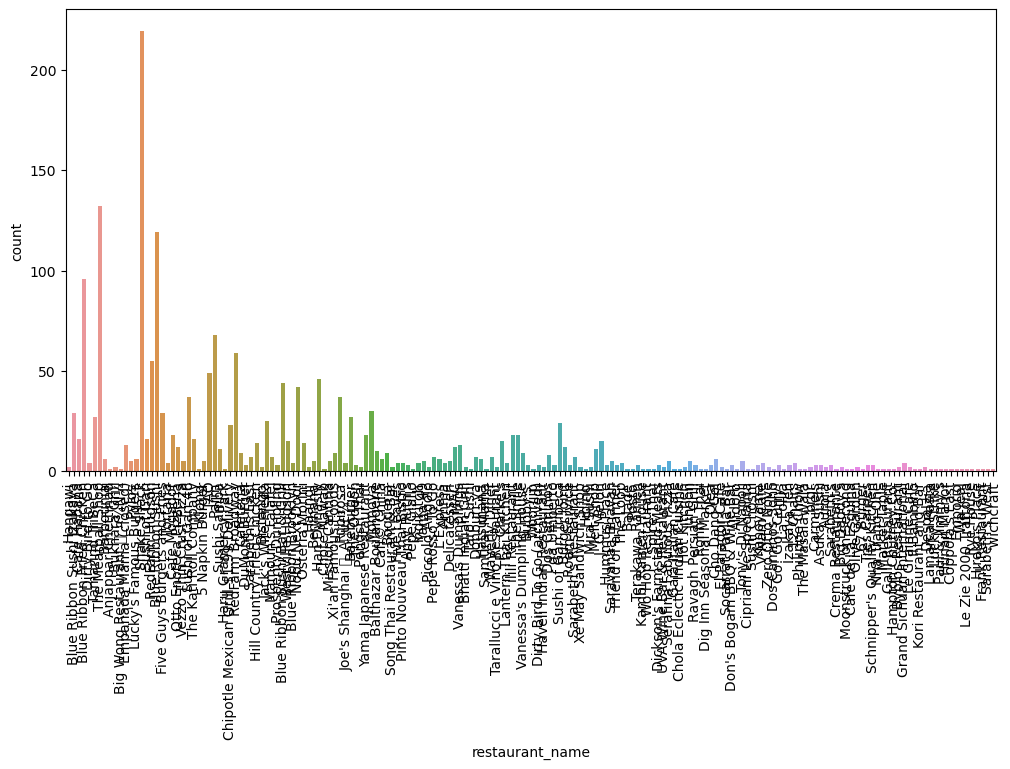

In [34]:
#Countplot of restaurant names
plt.figure(figsize=(12,6))
sns.countplot(x="restaurant_name", data=df)
plt.xticks(rotation=90)
plt.show()

There are too many restaurants for the names to be legible when plotted, but we can see that there are a few that are more popular by looking at the height of their bars. 

In [25]:
# Top 5 restaurants by number of orders
df['restaurant_name'].value_counts().nlargest(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

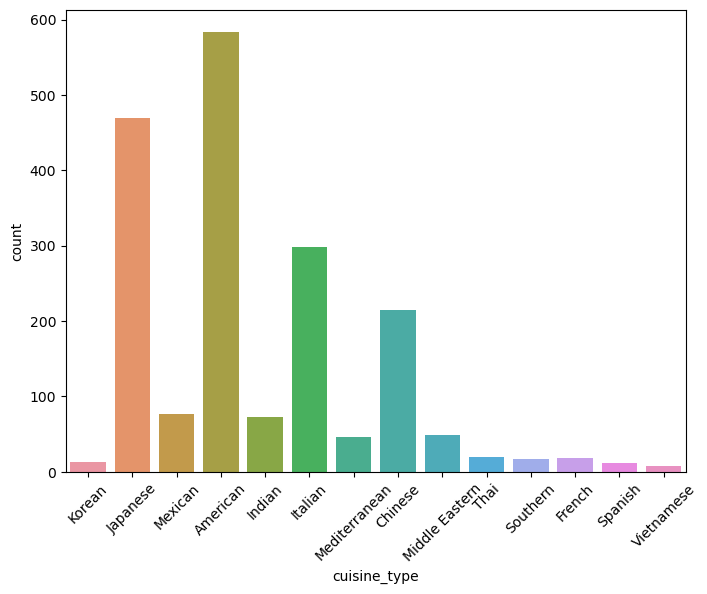

In [29]:
#This figure shows the most popular type of cusine is American followed by Japanese and then Italian

plt.figure(figsize=(8,6))
sns.countplot(x="cuisine_type", data=df)
plt.xticks(rotation=45)
plt.show()

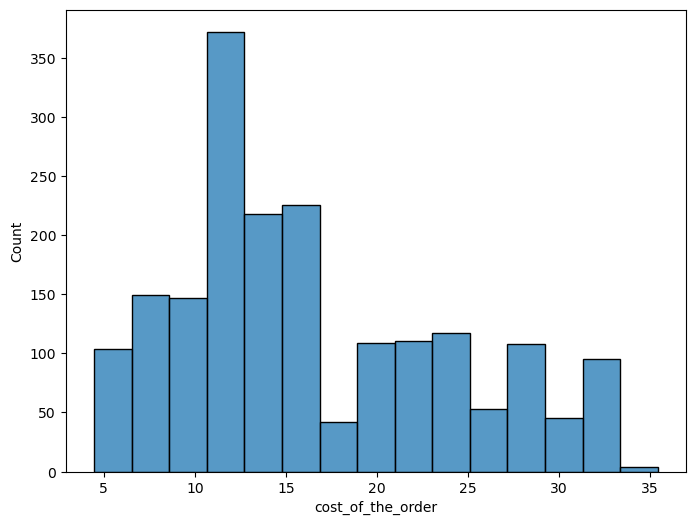

In [150]:
#This figure shows that majority of the costs per order lie between around 11 - 16 dollars.
plt.figure(figsize=(8,6))
sns.histplot(x='cost_of_the_order', data=df, bins=15)
plt.show()

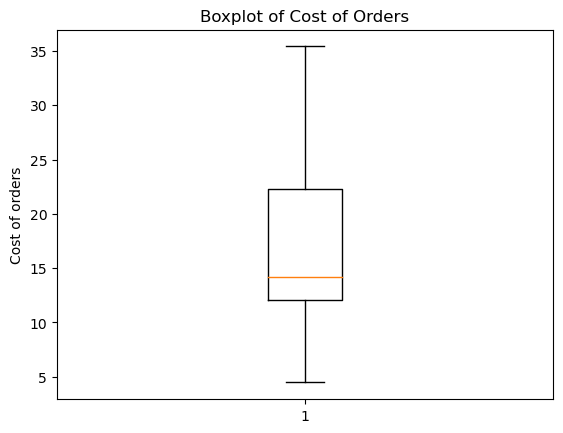

In [40]:
# This box plot shows that the median is around 14 dollars for cost of orders
plt.boxplot(df['cost_of_the_order'])
plt.title('Boxplot of Cost of Orders')
plt.ylabel('Cost of orders')
plt.show()

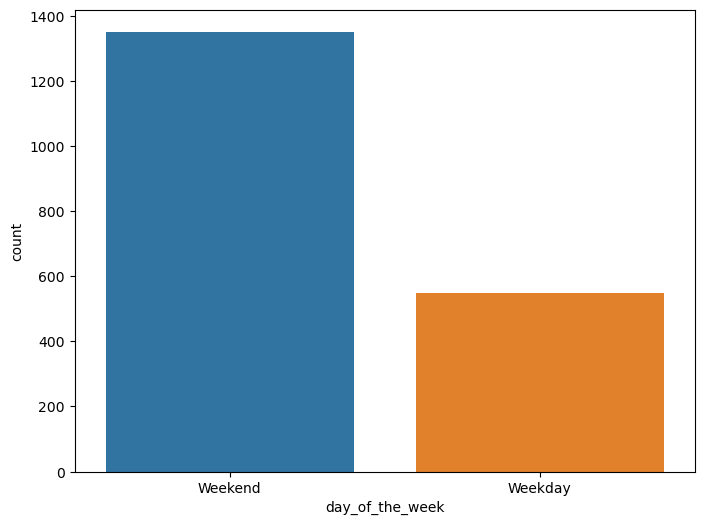

In [42]:
#This shows that majority of the orders are placed on the weekends

plt.figure(figsize=(8,6))
sns.countplot(x="day_of_the_week", data=df)
plt.show()

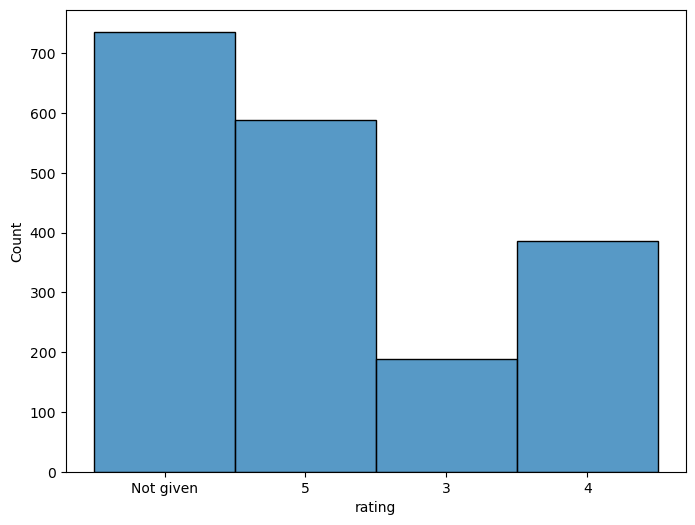

In [44]:
#This shows that ratings not given is the most common, but when ratings are given, the highest frequecny is  5 star ratings 
#followed by 4 and 3

plt.figure(figsize=(8,6))
sns.histplot(x="rating", data=df, bins=5)
plt.show()

In [64]:
#Checking the number of unique values in food preparation time to use as the bin number for the histogram
df['food_preparation_time'].nunique()

16

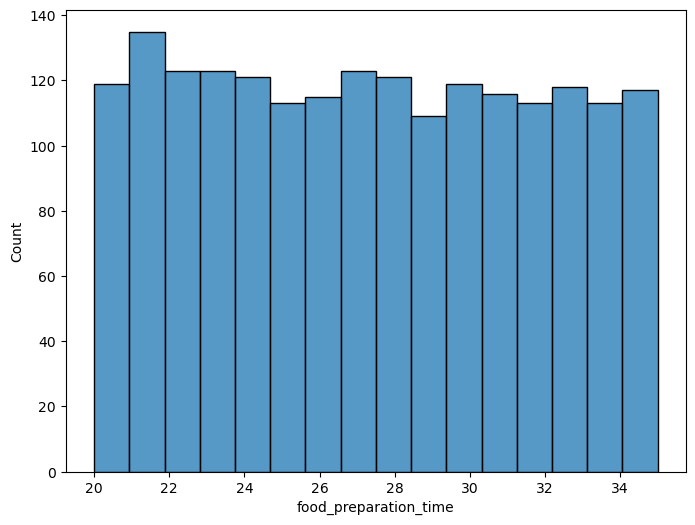

In [66]:
#The histograme shows that there is relatively uniform distribution of the food prep times across the orders
plt.figure(figsize=(8,6))
sns.histplot(x="food_preparation_time", data=df, bins= 16)
plt.show()

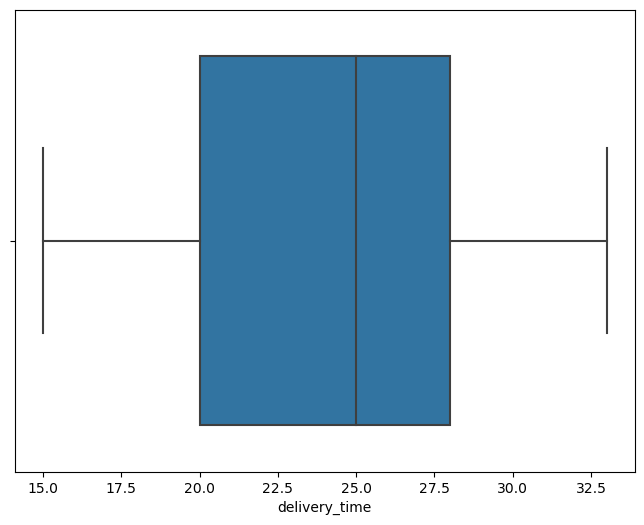

In [72]:
#This shows that majority of deliveries take place between 20 minutes and 28 minutes with the median time being 25 minutes
plt.figure(figsize=(8,6))
sns.boxplot(x="delivery_time", data=df)
plt.show()

### Which are the top 5 restaurants in terms of the number of orders received?

In [106]:
# Top 5 restaurants by number of orders
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### Which is the most popular cuisine on weekends?

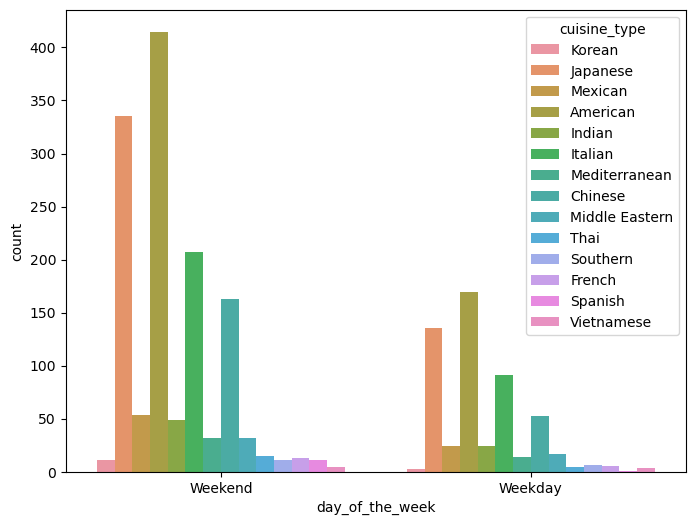

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(x="day_of_the_week", data=df, hue = "cuisine_type")
plt.show()

#American is the most popular cuisine on weekends

### What percentage of the orders cost more than 20 dollars? 

In [131]:
over_20_count = 0

# Loop through the cost_of_the_order and adding 1 to over 20 count whenever the cost is over 20
for i in df['cost_of_the_order']:
    if i > 20:
        over_20_count += 1

# Calculating the percentage of orders that cost more than 20 dollarsm where len(df) is the number of rows
percent = (over_20_count / len(df)) * 100
percent

29.24130663856691

### What is the mean order delivery time?

In [76]:
df['delivery_time'].mean()

#The mean is 24.16 minutes

24.161749209694417

### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. I will find the IDs of these customers and the number of orders they placed. 

In [104]:
df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

### Multivariate Analysis

### Performing a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 


<AxesSubplot:xlabel='rating', ylabel='cost_of_the_order'>

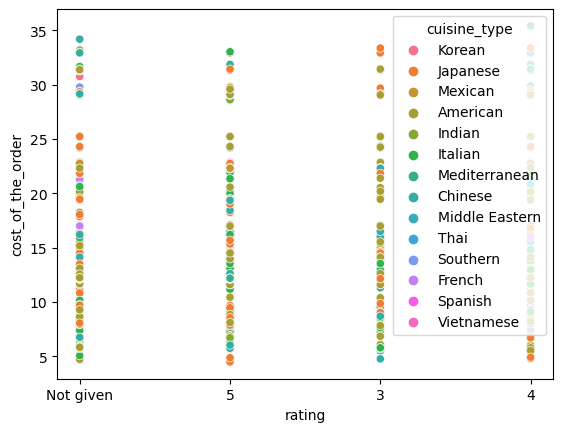

In [176]:
#Relatively equal spread on the cost of the order vs the rating
#indicating that the rating is not impacted by the cost of the order
sns.scatterplot(data=df, y="cost_of_the_order", x="rating", hue="cuisine_type")

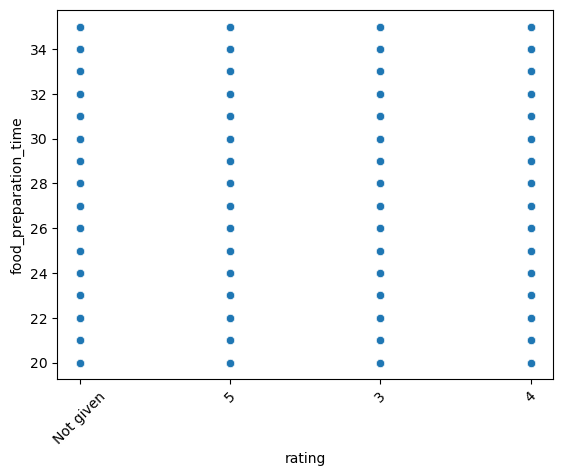

In [197]:
#No correlation between the time it took the prepare the food and the rating
sns.scatterplot(data=df, y="food_preparation_time", x="rating")
plt.xticks(rotation=45)
plt.show()

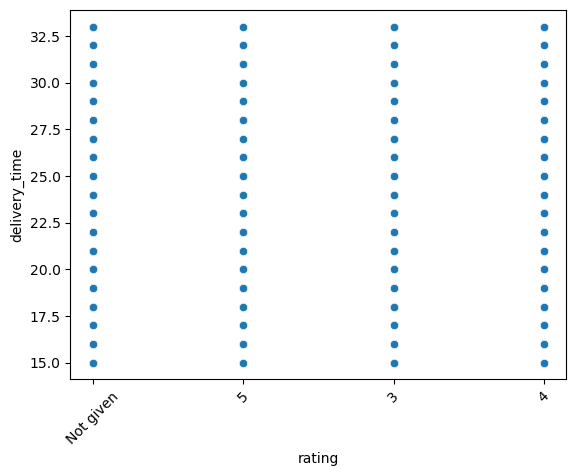

In [196]:
#No correlation between the time it took the prepare the food and the rating
sns.scatterplot(data=df, y="delivery_time", x="rating")
plt.xticks(rotation=45)
plt.show()

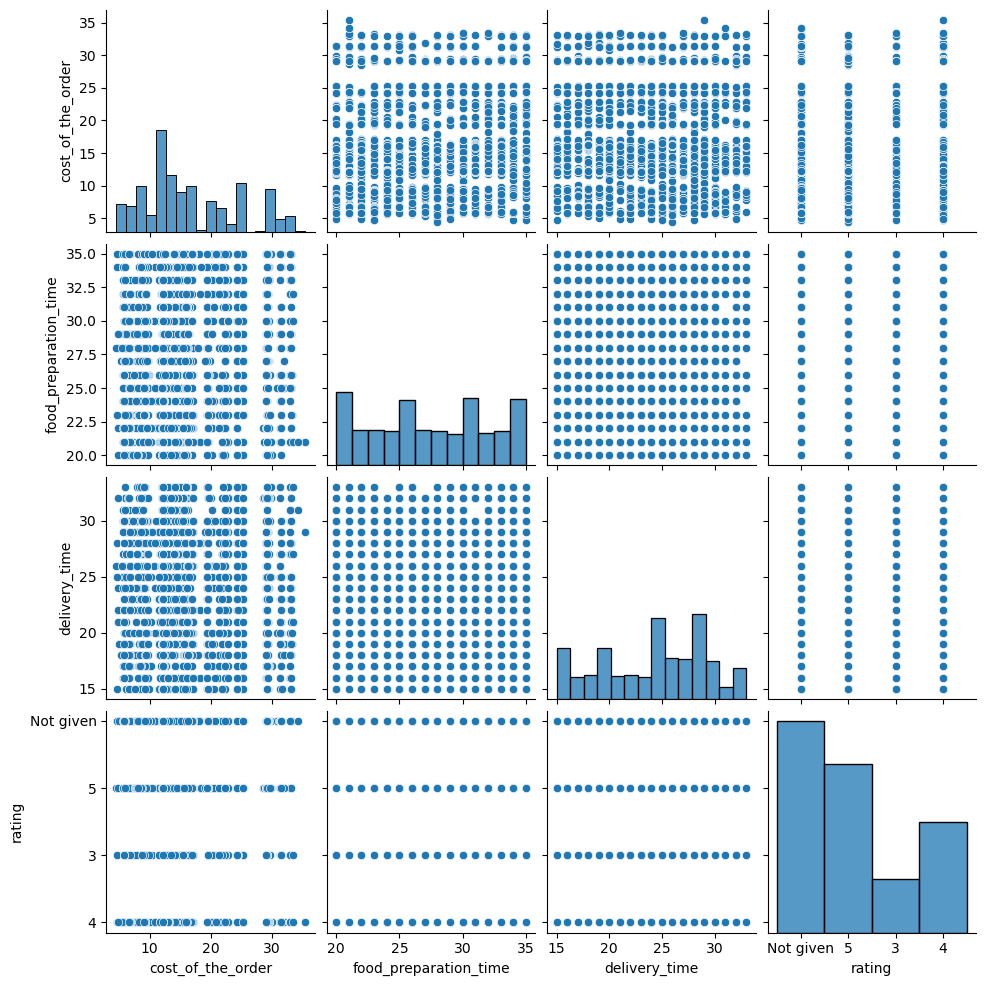

In [209]:
#No correlations seen
sns.pairplot(data=df, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating'])
plt.show()

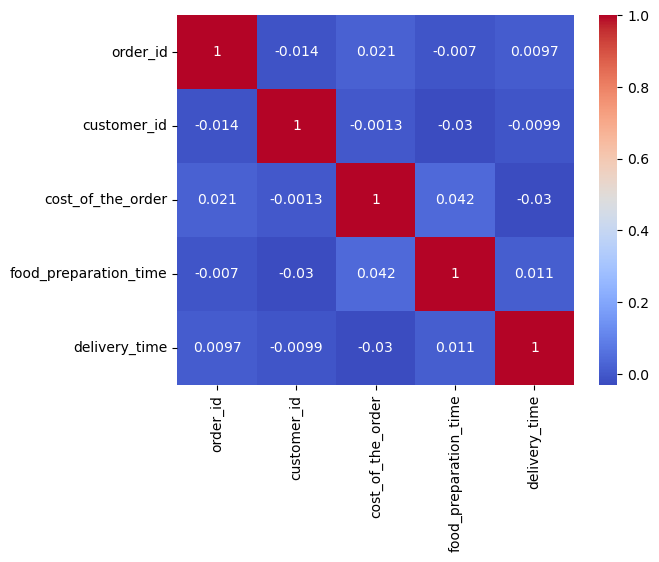

In [210]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

#No correlations noticed between numerical values

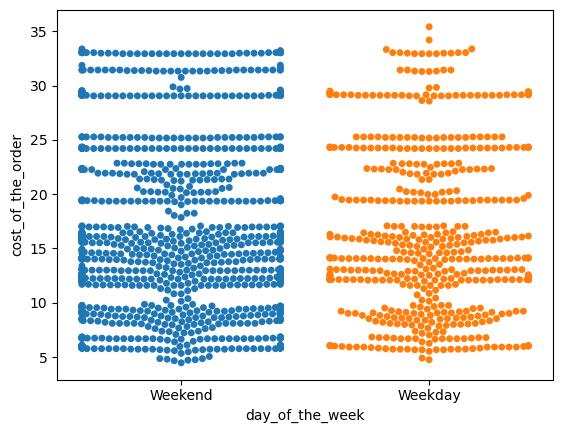

In [184]:
#Spreadh of cost of order is relatively similar on weekends and weekdays
#however there are more orders above 30 dollars on weekends

sns.swarmplot(y = 'cost_of_the_order', x = 'day_of_the_week', data = df)
plt.show()

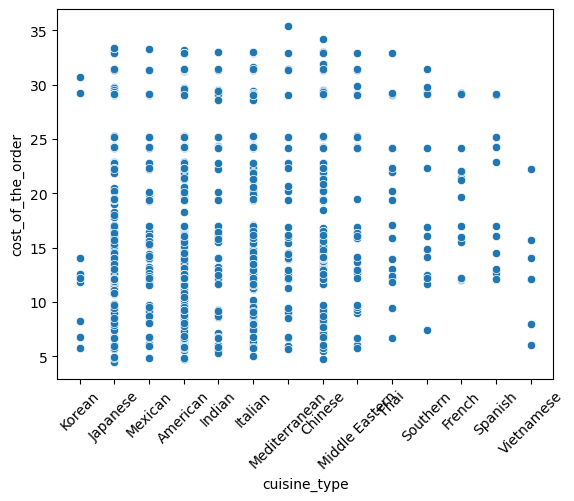

In [189]:
#Viatnamese is the only cuisine that doesnt have orders above 25 dollars, french and spanish dont have orders under 10 dollars
sns.scatterplot(data=df, y="cost_of_the_order", x="cuisine_type")
plt.xticks(rotation=45)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

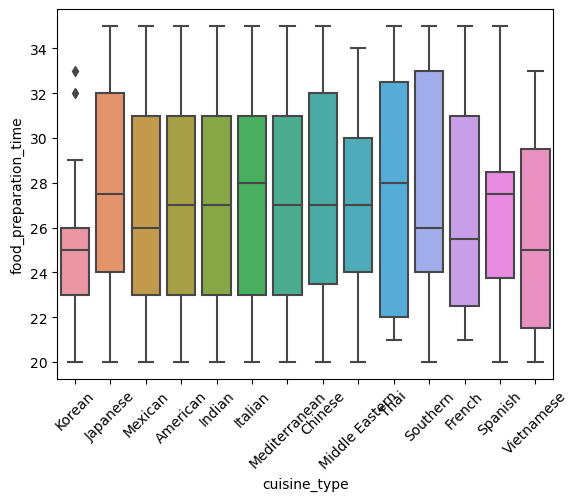

In [203]:
#Korean food and viatnemese food have the lowest median prepartion times, thai and italian have the highest

sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

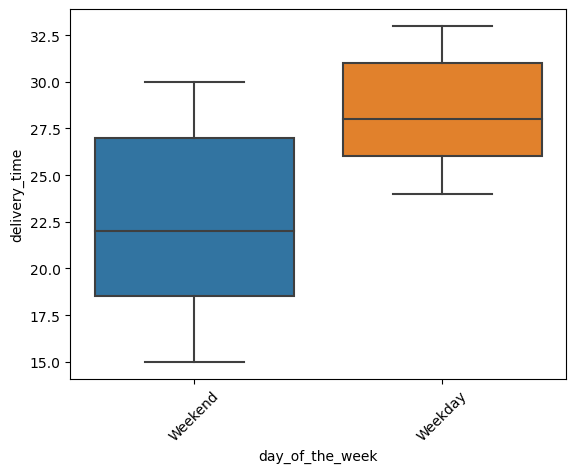

In [206]:
#Median delivery time is higher on weekdays
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

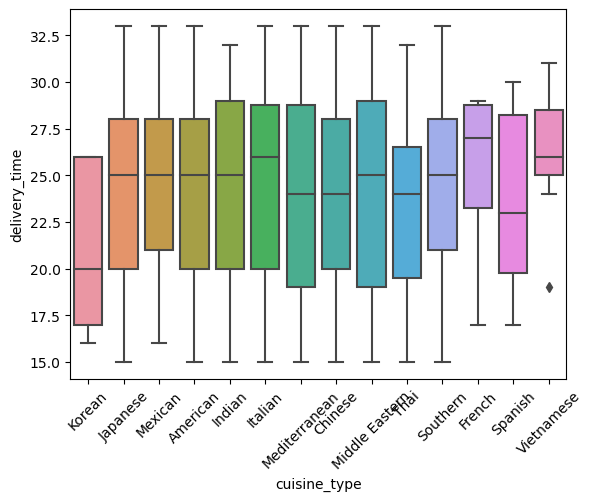

In [212]:
#French food has the highest median delivery time and korean food has the lowest median delivery time
sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.xticks(rotation=45)

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. I will find the restaurants fulfilling the criteria to get the promotional offer. 

In [130]:
df1=df.copy()
#First replace Not given ratings with NaN so that they dont contirbute to the rating count
df1['rating'] = df['rating'].replace("Not given", np.nan)
df1.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [120]:
#Only 4 restaurants have a rating count more than 50
df1.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).head()

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
Name: rating, dtype: int64

In [146]:
rating50=['Shake Shack','The Meatball Shop', 'Blue Ribbon Sushi','Blue Ribbon Fried Chicken']
#drop NAN values so that mean can be calulated
df1.dropna(subset=['rating'], inplace=True)
#convert column to int data type instead of object to check mean
df1['rating'] = df1['rating'].astype(int)

#Grouping by restaurant name and rating, finding the mean only for restaurants in the rating 50 array 
#(restaurants that have over 50 ratings)
df1.groupby('restaurant_name')['rating'].mean().loc[rating50]


restaurant_name
Shake Shack                  4.278195
The Meatball Shop            4.511905
Blue Ribbon Sushi            4.219178
Blue Ribbon Fried Chicken    4.328125
Name: rating, dtype: float64

In [ ]:
#These 4 restaurants have over 50 ratings and a mean rating over 4, therefore they fulfill the criteria to get 
#the promotional offer

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. I will find the net revenue generated by the company across all orders.

In [156]:
df1=df.copy()

#function that will be used to populate a new column 'commission_rate' based on the cost of the food order
def calculate_commission_rate(cost):
    if cost > 5 and cost > 20:
        return 0.25
    elif cost > 20:
        return 0.25
    elif cost > 5:
        return 0.15
    else:
        return 0

df1['commission_rate'] = df1['cost_of_the_order'].apply(calculate_commission_rate)

#Checking if commission rates match
df1[df1['cost_of_the_order']<5]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,commission_rate
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28,0.0
390,1477196,50123,Cafe Habana,Mexican,4.85,Weekend,5,28,22,0.0
480,1476877,53289,The Loop,Japanese,4.66,Weekend,Not given,34,25,0.0
542,1477788,270444,P.J. Clarke's,American,4.71,Weekend,Not given,23,15,0.0
624,1477349,52327,Nobu Next Door,Japanese,4.47,Weekend,5,28,26,0.0
664,1476909,366975,Blue Ribbon Sushi Bar & Grill,Japanese,4.85,Weekend,5,20,21,0.0
889,1477787,14869,Shake Shack,American,4.80,Weekend,4,22,24,0.0
1569,1477786,145389,RedFarm Hudson,Chinese,4.75,Weekend,3,23,25,0.0
1695,1478302,318665,Blue Ribbon Sushi Bar & Grill,Japanese,4.90,Weekday,4,29,32,0.0


In [160]:
#Checking if commission rates match
df1[df1['cost_of_the_order']>20]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,commission_rate
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,0.25
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,0.25
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,0.25
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,0.25
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,0.25
...,...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24,0.25
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,0.25
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21,0.25
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,0.25


In [159]:
#Checking if commission rates match
df1[(df1['cost_of_the_order'] > 5) & (df1['cost_of_the_order'] < 20)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,commission_rate
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,0.15
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,0.15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,0.15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.15
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.15
...,...,...,...,...,...,...,...,...,...,...
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,0.15
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28,0.15
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,0.15
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,0.15


In [162]:
#Now creating a commision column that multiplies the cost of the order with the commision rate
df1['commission']=df1['cost_of_the_order']*df1['commission_rate']
df1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,commission_rate,commission
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,0.25,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,0.15,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,0.15,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,0.25,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,0.15,1.7385


In [163]:
#Now sum all the commission to find net revenue for all orders, net revenue = 6166.30 dollars
df1['commission'].sum()

6166.303

### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [165]:
df1=df.copy()
#creating a new column that sums the food prep and delivery times per order
df1['total_delivery_time'] = df1['food_preparation_time'] + df1['delivery_time']

over_60_count = 0
# Loop through the cost_of_the_order and adding 1 to over_60_count whenever the total delivery time is over 60minutes
for i in df1['total_delivery_time']:
    if i> 60:
        over_60_count += 1

# Calculating the percentage of orders that cost more than 20 dollarsm where len(df) is the number of rows
percent = (over_60_count / len(df)) * 100
percent

#10.54% of orders take more than 60 minutes to get delivered from the time the order is placed

10.537407797681771

### The company wants to analyze the delivery time of the orders on weekdays and weekends. Let's find out how  the mean delivery time varies during weekdays and weekends? 

In [169]:
# Group by day of the week and checking mean delivery time for each column
df.groupby('day_of_the_week')['delivery_time'].mean()

#28.34 minutes on week days and 22.47 minutes on weekends.

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

### Conclusion and Recommendations

###  What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (I will use cuisine type and feedback ratings to drive my business recommendations.) 

### Conclusions:
*  After analysis, here are the key observations:

1. 786/1898 orders are unrated. 
2. American, Japanese, Italian and Meditteranean are the most popular cuisines. This remains true for weekends and weekdays.
3. Most orders cost between 11-16 dollars.
4. 29.24% of orders are over 20 dollars, hence only that percentage of orders gains the full commission rate
5. Despite the mean delivery time being 24.16%, over 10% of orders have a total delivery time of over 60 minutes.
6. Mean delivery time on weekdays is higher (28.34 minutes) than on weekends (22.47 minutes)

### Recommendations:

1. Unrated orders impact the method used to promote restaurants and hence should be investigated so that restaurants that users are fond of can be rightly evaluated and promoted to increase the probability of ordering.
2. Advertising restaurants that fall into the top 4 cuisines may drive up user activity.
3. Most orders fall within the 0.15 commision rate bracket. To increase net revenue, research needs to be conducted into how to get more users to spend more than 20 dollars to achieve the highest commision rate bracket.
4. Same as above.
5. 1 in 10 orders take over 60 minutes to reach customers. Higher delivery times can offput customers from returning to order again and so research needs to be conducted on how to reduce the delivery time on orders where the preparation time is high and vice versa.
6. Despite fewer orders being placed on weekdays, the average delivery time is higher compared to weekends where there is more demand. Lower demand should lead to lower delivery times and so the reason behind this also needs to be investigated and addressed.